In [ ]:
import keras
#from keras.layers.core import Layer
import keras.backend as K
import tensorflow as tf
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten, BatchNormalization, ReLU

import cv2 
import numpy as np 
from keras import backend as K 

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from skimage import exposure
from keras.utils.vis_utils import plot_model
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/er.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: er/Training/Sad/00017807.jpg  
  inflating: er/Training/Sad/00017830.jpg  
  inflating: er/Training/Sad/00017839.jpg  
  inflating: er/Training/Sad/00017841.jpg  
  inflating: er/Training/Sad/00017849.jpg  
  inflating: er/Training/Sad/00017851.jpg  
  inflating: er/Training/Sad/00017857.jpg  
  inflating: er/Training/Sad/00017862.jpg  
  inflating: er/Training/Sad/00017869.jpg  
  inflating: er/Training/Sad/00017870.jpg  
  inflating: er/Training/Sad/00017884.jpg  
  inflating: er/Training/Sad/00017887.jpg  
  inflating: er/Training/Sad/00017888.jpg  
  inflating: er/Training/Sad/00017889.jpg  
  inflating: er/Training/Sad/00017902.jpg  
  inflating: er/Training/Sad/00017912.jpg  
  inflating: er/Training/Sad/00017914.jpg  
  inflating: er/Training/Sad/00017943.jpg  
  inflating: er/Training/Sad/00017951.jpg  
  inflating: er/Training/Sad/00017953.jpg  
  inflating: er/Training/Sad/00017956.jpg  
  inflating: er/Training/

In [ ]:
# model 2 -2.8
img_rows,img_cols=48,48


input_layer = Input(shape=(48, 48, 1))

x = Conv2D(32, (3, 3), padding='same',strides=(1, 1), activation='relu', name='conv_1_3x3/1')(input_layer)
x=BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='same',strides=(1, 1), activation='relu', name='conv_1a_3x3/1')(x)
x=BatchNormalization()(x)
x = MaxPool2D((2, 2), name='max_pool_1_3x3/2')(x)
x=BatchNormalization()(x)
x=Dropout(0.2)(x)

#Block 2A
x1 = Conv2D(64, (3, 3), padding='same',strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x1=BatchNormalization()(x1)
x12 = Conv2D(64, (3, 3), padding='same',strides=(1, 1), activation='relu', name='conv_2a1_3x3/1')(x1)
x12=BatchNormalization()(x12)
#Block 2B
y1 = Conv2D(64, (3, 3), padding='same',strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
y1=BatchNormalization()(y1)
y12 = Conv2D(64, (3, 3), padding='same',strides=(1, 1), activation='relu', name='conv_2b1_3x3/1')(y1)
y12=BatchNormalization()(y12)

concat_b2 = concatenate([x, x12, y12], axis=3,name='inception_dense_1')
#trans
t1 = Conv2D(64, (1, 1), padding='same',strides=(1, 1), activation='relu', name='conv_t1_3x3/1')(concat_b2)
t1=BatchNormalization()(t1)
t2 = MaxPool2D((2, 2), name='max_pool_t2_3x3/2')(t1)
t2=BatchNormalization()(t2)
t2=Dropout(0.2)(t2)

#Block 3A
x2 = Conv2D(128, (3, 3), padding='same',strides=(1, 1), activation='relu', name='conv_3a_3x3/1')(t2)
x2=BatchNormalization()(x2)
x22 = Conv2D(128, (3, 3), padding='same',strides=(1, 1), activation='relu', name='conv_3a1_3x3/1')(x2)
x22=BatchNormalization()(x22)
#Block 3B
y2 = Conv2D(128, (3, 3), padding='same',strides=(1, 1), activation='relu', name='conv_3b_3x3/1')(t2)
y2=BatchNormalization()(y2)
y22 = Conv2D(128, (3, 3), padding='same',strides=(1, 1), activation='relu', name='conv_3b1_3x3/1')(y2)
y22=BatchNormalization()(y22)

concat_b3 = concatenate([t2, x22, y22], axis=3,name='inception_dense_2')
#trans
t3 = Conv2D(128, (1, 1), padding='same',strides=(1, 1), activation='relu', name='conv_t3_3x3/1')(concat_b3)
t3=BatchNormalization()(t3)
t4 = MaxPool2D((2, 2), name='max_pool_t4_3x3/2')(t3)
t4=BatchNormalization()(t4)
t4=Dropout(0.2)(t4)



#Block 4A
x3 = Conv2D(256, (3, 3), padding='same',strides=(1, 1), activation='relu', name='conv_4a_3x3/1')(t4)
x3=BatchNormalization()(x3)
x32 = Conv2D(256, (3, 3), padding='same',strides=(1, 1), activation='relu', name='conv_4a1_3x3/1')(x3)
x32=BatchNormalization()(x32)
#Block 4B
y3 = Conv2D(256, (3, 3), padding='same',strides=(1, 1), activation='relu', name='conv_4b_3x3/1')(t4)
y3=BatchNormalization()(y3)
y32 = Conv2D(256, (3, 3), padding='same',strides=(1, 1), activation='relu', name='conv_4b1_3x3/1')(y3)
y32=BatchNormalization()(y32)
concat_b4 = concatenate([t4, x32, y32], axis=3,name='inception_dense_4')
#trans
t5 = Conv2D(256, (1, 1), padding='same',strides=(1, 1), activation='relu', name='conv_t5_3x3/1')(concat_b4)
t5=BatchNormalization()(t5)
#t6 = MaxPool2D((2, 2), name='max_pool_t6_3x3/2')(t5)
#t6=BatchNormalization()(t6)
t5=Dropout(0.2)(t5)

t8 = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(t5)


# Block-6

xf=Dense(512,activation='relu')(t8)
xf=BatchNormalization()(xf)
xf=Dropout(0.5)(xf)

# Block-6

xf=Dense(256,activation='relu')(xf)
xf=BatchNormalization()(xf)
xf=Dropout(0.5)(xf)

# Block-7

xf=Dense(7,activation='softmax')(xf)
#xf=Dense(2,activation='sigmoid')(xf)
model = Model(input_layer, [xf], name='inception_v1')
model.summary()


Model: "inception_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv_1_3x3/1 (Conv2D)          (None, 48, 48, 32)   320         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_22 (BatchN  (None, 48, 48, 32)  128         ['conv_1_3x3/1[0][0]']           
 ormalization)                                                                                    
                                                                                                  
 conv_1a_3x3/1 (Conv2D)         (None, 48, 48, 32)   9248        ['batch_normalization_

In [ ]:
#data generation with seed value
seed=1
batch_size=256
train_sample=28709
valid_sample=3589
test_sample=3589
img_rows,img_cols=48,48
#train_path = 'sorted_set_3_frame_split_8_2_new/train'
#valid_path = 'sorted_set_3_frame_split_8_2_new/val'
#test_path = 'sorted_set_3_frame_split_8_2_new/val'
train_path = 'er/Training'
valid_path = 'er/PrivateTest'
test_path = 'er/PrivateTest'
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					width_shift_range=0.2,
					height_shift_range=0.2,
					horizontal_flip=True, 
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_path,
          color_mode='grayscale',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='categorical',seed=seed,
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							valid_path,
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',seed=seed,
							shuffle=True)
test_generator= ImageDataGenerator(rescale=1./255).flow_from_directory(test_path, 
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical', seed=seed,
							shuffle=False)


Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
import math
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import os
#filepath="/content/drive/My Drive/fer_new_vgg/fold1_jaffe_epochs:{epoch:03d}-accuracy:{val_accuracy:.4f}.hdf5"

filepath="/content/drive/My Drive/fer_new_vgg/fer_peerj_w_aug.hdf5"
checkpoint_dir = os.path.dirname(filepath)
initial_lrate = 0.001
def step_decay(epoch): 
   drop = 0.5
   epochs_drop = 20.0
   lrate = initial_lrate * math.pow(drop,  math.floor((1+epoch)/epochs_drop))
   return lrate
lrate = LearningRateScheduler(step_decay)
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=2)

callbacks = [checkpoint, lrate]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

epochs=150

history=model.fit(
                train_generator,
                steps_per_epoch=train_sample//batch_size+1,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=valid_sample//batch_size+1)

Epoch 1/150
113/113 [==============================] - ETA: 0s - loss: 2.4099 - accuracy: 0.1888
Epoch 1: val_accuracy improved from -inf to 0.24492, saving model to /content/drive/My Drive/fer_new_vgg/fer_peerj_w_aug.hdf5
113/113 [==============================] - 31s 254ms/step - loss: 2.4099 - accuracy: 0.1888 - val_loss: 1.9063 - val_accuracy: 0.2449 - lr: 0.0010
Epoch 2/150
113/113 [==============================] - ETA: 0s - loss: 2.0035 - accuracy: 0.2264
Epoch 2: val_accuracy did not improve from 0.24492
113/113 [==============================] - 25s 225ms/step - loss: 2.0035 - accuracy: 0.2264 - val_loss: 1.9381 - val_accuracy: 0.2343 - lr: 0.0010
Epoch 3/150
113/113 [==============================] - ETA: 0s - loss: 1.8761 - accuracy: 0.2502
Epoch 3: val_accuracy did not improve from 0.24492
113/113 [==============================] - 26s 228ms/step - loss: 1.8761 - accuracy: 0.2502 - val_loss: 1.8604 - val_accuracy: 0.2430 - lr: 0.0010
Epoch 4/150
113/113 [===================

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

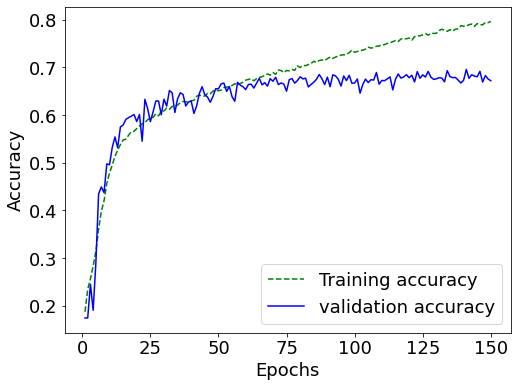

In [ ]:
from google.colab import files
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,151)
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 18
plt.plot(epochs, loss_train, 'g--', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
#plt.title('Training and Validation accuracy')
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.legend()
plt.savefig('acc_FER_2013_review.png')
files.download("acc_FER_2013_review.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

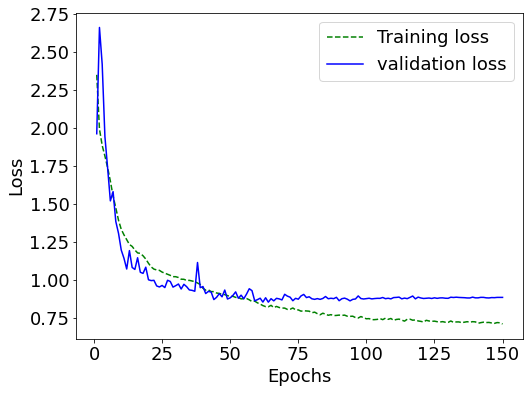

In [ ]:
from google.colab import files
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,151)
plt.figure(figsize=(8,6))
plt.plot(epochs, loss_train, 'g--', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
#plt.title('Training and Validation accuracy')
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend()
plt.savefig('loss_FER_2013_review.png')
files.download("loss_FER_2013_review.png")
plt.show()

In [ ]:
model.load_weights("/content/drive/My Drive/fer_new_vgg/fer_peerj_review.hdf5") 

In [ ]:
predictions = model.predict(test_generator, steps=test_sample//batch_size+1, verbose=0)

In [ ]:
from google.colab import files

In [ ]:
cm_plot_labels = ['AN',
 'DI',
 'FE',
 'HA',
 'NE',
 'SA',
 'SU']
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10,6))
p=sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels)
sns.set(font_scale=5)
p.set_xticklabels(p.get_xmajorticklabels(), fontsize = 15)
p.set_yticklabels(p.get_ymajorticklabels(), fontsize = 15)
plt.ylabel('Actual', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
#plt.savefig('conf_FER_2013_review.png')
#files.download("conf_FER_2013_review.png")
plt.show(block=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_generator.classes, predictions.argmax(axis=1),target_names=cm_plot_labels,digits=4))
plt.savefig('classification_report_FER_2013.png')
#files.download("classification_report_FER_2013.png")

              precision    recall  f1-score   support

          AN     0.6198    0.6640    0.6411       491
          DI     0.8039    0.7455    0.7736        55
          FE     0.6361    0.3939    0.4865       528
          HA     0.9223    0.8908    0.9062       879
          NE     0.5935    0.7907    0.6781       626
          SA     0.5747    0.5505    0.5623       594
          SU     0.7852    0.8173    0.8009       416

    accuracy                         0.7021      3589
   macro avg     0.7051    0.6932    0.6927      3589
weighted avg     0.7062    0.7021    0.6973      3589



<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
import math
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import os
#filepath="/content/drive/My Drive/fer_new_vgg/fold1_jaffe_epochs:{epoch:03d}-accuracy:{val_accuracy:.4f}.hdf5"

filepath="/content/drive/My Drive/fer_new_vgg/fer_peerj_001.hdf5"
checkpoint_dir = os.path.dirname(filepath)
initial_lrate = 0.001
def step_decay(epoch): 
   drop = 0.5
   epochs_drop = 20.0
   lrate = initial_lrate * math.pow(drop,  math.floor((1+epoch)/epochs_drop))
   return lrate
lrate = LearningRateScheduler(step_decay)
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=2)

callbacks = [checkpoint, lrate]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

epochs=80

history=model.fit(
                train_generator,
                steps_per_epoch=train_sample//batch_size+1,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=valid_sample//batch_size+1)

Epoch 1/80
113/113 [==============================] - ETA: 0s - loss: 2.3790 - accuracy: 0.1893
Epoch 1: val_accuracy improved from -inf to 0.24492, saving model to /content/drive/My Drive/fer_new_vgg/fer_peerj_001.hdf5
113/113 [==============================] - 31s 229ms/step - loss: 2.3790 - accuracy: 0.1893 - val_loss: 1.8562 - val_accuracy: 0.2449 - lr: 0.0010
Epoch 2/80
113/113 [==============================] - ETA: 0s - loss: 1.9718 - accuracy: 0.2342
Epoch 2: val_accuracy did not improve from 0.24492
113/113 [==============================] - 24s 215ms/step - loss: 1.9718 - accuracy: 0.2342 - val_loss: 1.9035 - val_accuracy: 0.1683 - lr: 0.0010
Epoch 3/80
113/113 [==============================] - ETA: 0s - loss: 1.8650 - accuracy: 0.2667
Epoch 3: val_accuracy did not improve from 0.24492
113/113 [==============================] - 24s 215ms/step - loss: 1.8650 - accuracy: 0.2667 - val_loss: 2.2366 - val_accuracy: 0.2223 - lr: 0.0010
Epoch 4/80
113/113 [=========================

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

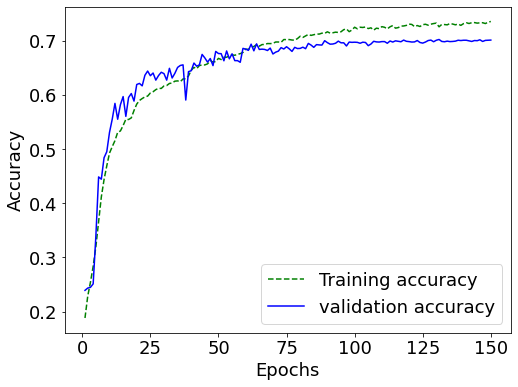

In [ ]:
from google.colab import files
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,151)
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 18
plt.plot(epochs, loss_train, 'g--', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
#plt.title('Training and Validation accuracy')
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.legend()
plt.savefig('acc_FER_2013_review.png')
files.download("acc_FER_2013_review.png")
plt.show()

In [ ]:
model.load_weights('/content/drive/My Drive/fer_new_vgg/fer_peerj_review_adam03.hdf5') 

In [ ]:
predictions = model.predict(test_generator, steps=test_sample//batch_size+1, verbose=0)

In [ ]:
from google.colab import files

In [ ]:
cm_plot_labels = ['AN',
 'DI',
 'FE',
 'HA',
 'NE',
 'SA',
 'SU']
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10,6))
p=sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels)
sns.set(font_scale=5)
p.set_xticklabels(p.get_xmajorticklabels(), fontsize = 17)
p.set_yticklabels(p.get_ymajorticklabels(), fontsize = 17)
plt.ylabel('Actual', fontsize=18)
plt.xlabel('Predicted', fontsize=18)
plt.savefig('conf_FER_2013_review.png')
files.download("conf_FER_2013_review.png")
plt.show(block=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_generator.classes, predictions.argmax(axis=1),target_names=cm_plot_labels,digits=4))
plt.savefig('classification_report_FER_2013.png')
files.download("classification_report_FER_2013.png")

In [ ]:
adam_train_102 = history.history['accuracy']
adam_val_102 = history.history['val_accuracy']

In [ ]:
adam_train_102_loss = history.history['loss']
adam_val_102_loss = history.history['val_loss']

In [ ]:
adam_val_102_loss

[1.8562263250350952,
 1.9034936428070068,
 2.236605167388916,
 1.7907860279083252,
 1.5813572406768799,
 1.9076611995697021,
 1.5087940692901611,
 1.408145546913147,
 1.2522530555725098,
 1.2426210641860962,
 1.179383397102356,
 1.1292723417282104,
 1.0937449932098389,
 1.1093641519546509,
 1.1129637956619263,
 1.0651054382324219,
 1.0525412559509277,
 1.084707498550415,
 1.1505727767944336,
 0.9921057820320129,
 0.9650365710258484,
 0.9845463633537292,
 0.9665543437004089,
 0.9924574494361877,
 0.9689432978630066,
 0.9415308833122253,
 0.9478428959846497,
 0.9419902563095093,
 1.0133944749832153,
 0.9307990074157715,
 0.955664336681366,
 0.956190288066864,
 0.9528433084487915,
 0.9322994947433472,
 0.9511100649833679,
 0.9237938523292542,
 0.960987389087677,
 0.9337862133979797,
 0.9379055500030518,
 0.9177625179290771,
 0.9705584645271301,
 0.9525883793830872,
 0.898391604423523,
 0.9121416211128235,
 0.9081788659095764,
 0.9042778015136719,
 0.9184128046035767,
 0.9048588871955872,


In [ ]:
step_train_102_loss = history.history['loss']
step_val_102_loss = history.history['val_loss']

In [ ]:
step_train_102 = history.history['accuracy']
step_val_102 = history.history['val_accuracy']

In [ ]:
step_train_102_loss=[2.4112496376037598,
 1.99918794631958,
 1.8865187168121338,
 1.7922449111938477,
 1.7133780717849731,
 1.6188770532608032,
 1.5517560243606567,
 1.44344961643219,
 1.3839056491851807,
 1.3339000940322876,
 1.285117745399475,
 1.2696458101272583,
 1.2423356771469116,
 1.2296360731124878,
 1.2028957605361938,
 1.1863703727722168,
 1.1703218221664429,
 1.1643704175949097,
 1.151103138923645,
 1.1017792224884033,
 1.0863420963287354,
 1.0752266645431519,
 1.0781805515289307,
 1.062042236328125,
 1.0568362474441528,
 1.0470521450042725,
 1.0434372425079346,
 1.033473253250122,
 1.0306711196899414,
 1.0205427408218384,
 1.0223559141159058,
 1.014589548110962,
 1.0064669847488403,
 1.0015588998794556,
 0.996764600276947,
 0.9976704120635986,
 0.9816612005233765,
 0.9820794463157654,
 0.9800592660903931,
 0.9461185932159424,
 0.9406641125679016,
 0.9320430755615234,
 0.9213550090789795,
 0.9236164093017578,
 0.9173986315727234,
 0.9190242886543274,
 0.9090458750724792,
 0.9042385220527649,
 0.9019847512245178,
 0.8998773097991943,
 0.8923376202583313,
 0.8896751403808594,
 0.8824751377105713,
 0.8831697106361389,
 0.8808389902114868,
 0.8755315542221069,
 0.8723514676094055,
 0.8683023452758789,
 0.8694620132446289,
 0.8514923453330994,
 0.8435272574424744,
 0.839113175868988,
 0.8353946208953857,
 0.8350208401679993,
 0.82970130443573,
 0.8293518424034119,
 0.8219227194786072,
 0.8205080628395081,
 0.8217278122901917,
 0.8116207122802734,
 0.8147616982460022,
 0.8049269318580627,
 0.8039705157279968,
 0.8096553683280945,
 0.8098589181900024,
 0.8014189600944519,
 0.8000913858413696,
 0.7947331666946411,
 0.7952649593353271,
 0.7832058072090149,
 0.7766119241714478,
 0.7746554613113403,
 0.7709751725196838,
 0.7766091823577881,
 0.7696519494056702,
 0.7706971764564514,
 0.7682554721832275,
 0.7676776647567749,
 0.7645989060401917,
 0.7614338994026184,
 0.7651862502098083,
 0.7634640336036682,
 0.7522865533828735,
 0.7488966584205627,
 0.754635214805603,
 0.7519744038581848,
 0.7573014497756958,
 0.7491222023963928,
 0.7569279670715332,
 0.7434566617012024,
 0.7407034635543823,
 0.7447026371955872,
 0.739788293838501,
 0.7338610291481018,
 0.7374114394187927,
 0.7360764741897583,
 0.7419936656951904,
 0.7379038333892822,
 0.7373855710029602,
 0.7348989844322205,
 0.7347795367240906,
 0.7342065572738647,
 0.7338231205940247,
 0.7348343729972839,
 0.7337125539779663,
 0.7320971488952637,
 0.7322015762329102,
 0.7309046387672424,
 0.7218074798583984,
 0.7212684750556946,
 0.7196352481842041,
 0.7223727703094482,
 0.725764811038971,
 0.7200747132301331,
 0.7173604965209961,
 0.7158859372138977,
 0.7204105257987976,
 0.7161679863929749,
 0.7210772037506104,
 0.7173449993133545,
 0.7204670310020447,
 0.7191779017448425,
 0.723750114440918,
 0.7203500270843506,
 0.717676043510437,
 0.7193249464035034,
 0.7139413952827454,
 0.7174779176712036,
 0.7188515067100525,
 0.717117428779602,
 0.7107354998588562,
 0.7156943082809448,
 0.7157251238822937,
 0.7075267434120178,
 0.7080672383308411,
 0.7110326290130615,
 0.7093969583511353,
 0.7114720344543457,
 0.7089695930480957,
 0.7097384333610535]


In [ ]:
step_val_102_loss= [1.837062954902649, 1.8729418516159058, 1.8923979997634888, 1.9082685708999634, 1.5959240198135376, 1.5094249248504639, 1.4566311836242676, 1.3193285465240479, 1.2682386636734009, 1.2155461311340332, 1.163205623626709, 1.2646418809890747, 1.1380672454833984, 1.1835237741470337, 1.1780575513839722, 1.0462901592254639, 1.0685080289840698, 1.1085184812545776, 1.1106830835342407, 0.9977587461471558, 0.9860972762107849, 0.9640897512435913, 0.9599403142929077, 1.0252619981765747, 0.9671554565429688, 0.9817778468132019, 0.9576855301856995, 0.9705910086631775, 0.9797171950340271, 1.0098168849945068, 0.9519495964050293, 0.9680654406547546, 0.9804855585098267, 0.9118884205818176, 0.9792590737342834, 0.9143326878547668, 0.9433382749557495, 0.9265919923782349, 0.980873167514801, 0.9020172357559204, 0.9045049548149109, 0.8910823464393616, 0.9064255952835083, 0.9044294953346252, 0.8893885612487793, 0.8958775401115417, 0.9624768495559692, 0.9049695134162903, 0.9017840623855591, 0.8933103680610657, 0.9206002950668335, 0.8984477519989014, 0.9151391983032227, 0.9255069494247437, 0.8809974789619446, 0.908540666103363, 0.9012946486473083, 0.8976694941520691, 0.9238929748535156, 0.8814103603363037, 0.9129923582077026, 0.8845244646072388, 0.901532769203186, 0.8796486258506775, 0.889147162437439, 0.8939175605773926, 0.9118006229400635, 0.8983709812164307, 0.9001398682594299, 0.898044228553772, 0.8871471881866455, 0.9098193049430847, 0.8966654539108276, 0.8734248876571655, 0.8848499655723572, 0.880196213722229, 0.8851855993270874, 0.869269609451294, 0.8888251185417175, 0.897417426109314, 0.8879578709602356, 0.8890107870101929, 0.8923126459121704, 0.8906427621841431, 0.9010196924209595, 0.9031045436859131, 0.8915596008300781, 0.8860540986061096, 0.8842000961303711, 0.8988469243049622, 0.8964593410491943, 0.8992694020271301, 0.8911651968955994, 0.8982394933700562, 0.8919388055801392, 0.894382894039154, 0.908742368221283, 0.9008498787879944, 0.9086406826972961, 0.9106413125991821, 0.9035828709602356, 0.8961273431777954, 0.8993005156517029, 0.9029781222343445, 0.9039198756217957, 0.900410532951355, 0.9005919098854065, 0.8985530734062195, 0.896068811416626, 0.8925567269325256, 0.8944896459579468, 0.8949604034423828, 0.8944658041000366, 0.9006597995758057, 0.9056469798088074, 0.9056487083435059, 0.9037911295890808, 0.9068945050239563, 0.9038652777671814, 0.9002823829650879, 0.8956637382507324, 0.9056198000907898, 0.9012024402618408, 0.9010859131813049, 0.9052249789237976, 0.9000809788703918, 0.9031378030776978, 0.9022055864334106, 0.9028223156929016, 0.9046081304550171, 0.9007859826087952, 0.9033529162406921, 0.906652569770813, 0.9070854783058167, 0.9061462879180908, 0.9048144221305847, 0.9066768288612366, 0.9107235670089722, 0.911979079246521, 0.9030901789665222, 0.9048110842704773, 0.9063073396682739, 0.9057795405387878, 0.9068702459335327, 0.9062021970748901, 0.9044045805931091, 0.9052883386611938, 0.9079335927963257, 0.9101591110229492, 0.9101349115371704]


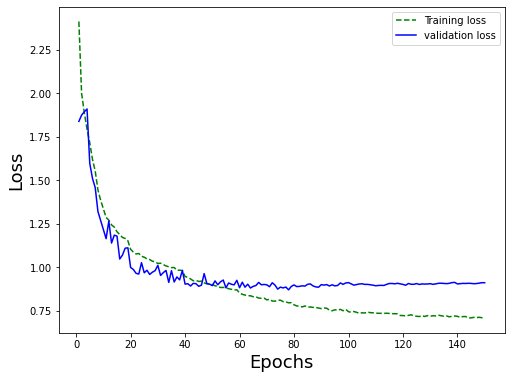

In [ ]:
#from google.colab import files
#loss_train = history.history['loss']
#loss_val = history.history['val_loss']
epochs = range(1,151)
plt.figure(figsize=(8,6))
plt.plot(epochs, step_train_102_loss, 'g--', label='Training loss')
plt.plot(epochs, step_val_102_loss, 'b', label='validation loss')
#plt.title('Training and Validation accuracy')
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend()
plt.savefig('loss_FER_2013_review_step.png')
#files.download("loss_FER_2013_review_step.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

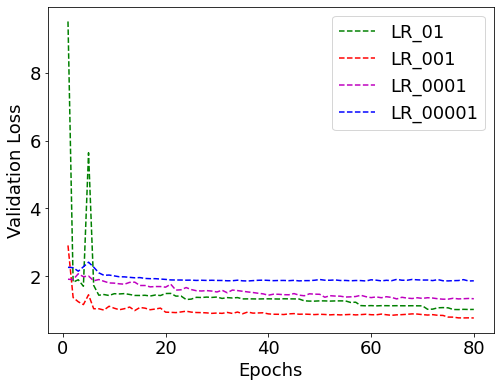

In [ ]:
from google.colab import files
epochs = range(1,81)
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 18
plt.plot(epochs, adam_val_101_loss, 'g--', label='LR_01')
plt.plot(epochs, adam_val_102_loss, 'r--', label='LR_001')
plt.plot(epochs, adam_val_103_loss, 'm--', label='LR_0001')
plt.plot(epochs, adam_val_104_loss, 'b--', label='LR_00001')
#plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.savefig('loss_LR_comparison.png')
files.download("loss_LR_comparison.png")
plt.show()

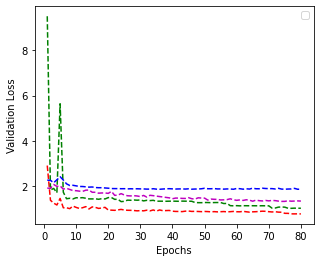

In [ ]:
epochs = range(1,81)
plt.figure(figsize=(5,4))
plt.plot(epochs, adam_val_102_loss, 'r--')
plt.plot(epochs, adam_val_101_loss, 'g--')
plt.plot(epochs, adam_val_103_loss, 'm--')
plt.plot(epochs, adam_val_104_loss, 'b--')
#plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

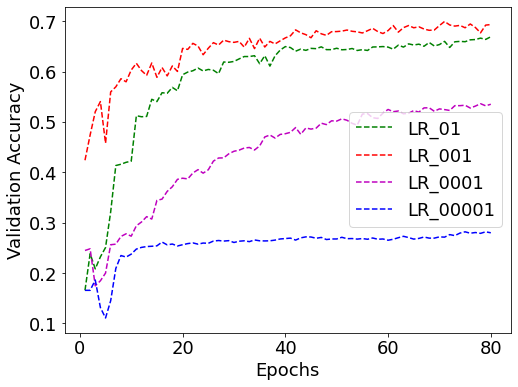

In [ ]:
epochs = range(1,81)
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 18
plt.plot(epochs, adam_val_101, 'g--', label='LR_01')
plt.plot(epochs, adam_val_102, 'r--', label='LR_001')
plt.plot(epochs, adam_val_103, 'm--', label='LR_0001')
plt.plot(epochs, adam_val_104, 'b--', label='LR_00001')
#plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.savefig('Acc_LR_comparison.png')
files.download("Acc_LR_comparison.png")
plt.show()

In [ ]:
seed=1
batch_size=256
train_sample=28709
valid_sample=3589
test_sample=3589
img_rows,img_cols=48,48
#train_path = 'sorted_set_3_frame_split_8_2_new/train'
#valid_path = 'sorted_set_3_frame_split_8_2_new/val'
#test_path = 'sorted_set_3_frame_split_8_2_new/val'
train_path = 'er/Training'
valid_path = 'er/PrivateTest'
test_path = 'er/PrivateTest'
"""
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					width_shift_range=0.3,
					height_shift_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')
"""
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
					train_path,
          color_mode='grayscale',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							valid_path,
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)
test_generator= ImageDataGenerator(rescale=1./255).flow_from_directory(valid_path, 
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=False)


Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
import math
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import os
#filepath="/content/drive/My Drive/fer_new_vgg/fold1_jaffe_epochs:{epoch:03d}-accuracy:{val_accuracy:.4f}.hdf5"

filepath="/content/drive/My Drive/fer_new_vgg/fer_peerj_wo_aug.hdf5"
checkpoint_dir = os.path.dirname(filepath)
initial_lrate = 0.001
def step_decay(epoch): 
   drop = 0.5
   epochs_drop = 20.0
   lrate = initial_lrate * math.pow(drop,  math.floor((1+epoch)/epochs_drop))
   return lrate
lrate = LearningRateScheduler(step_decay)
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=2)

callbacks = [checkpoint, lrate]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

epochs=150

history=model.fit(
                train_generator,
                steps_per_epoch=train_sample//batch_size+1,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=valid_sample//batch_size+1)

Epoch 1/150
113/113 [==============================] - ETA: 0s - loss: 2.3530 - accuracy: 0.2002
Epoch 1: val_accuracy improved from -inf to 0.24492, saving model to /content/drive/My Drive/fer_new_vgg/fer_peerj_wo_aug.hdf5
113/113 [==============================] - 31s 168ms/step - loss: 2.3530 - accuracy: 0.2002 - val_loss: 2.1678 - val_accuracy: 0.2449 - lr: 0.0010
Epoch 2/150
113/113 [==============================] - ETA: 0s - loss: 1.8179 - accuracy: 0.3142
Epoch 2: val_accuracy did not improve from 0.24492
113/113 [==============================] - 16s 138ms/step - loss: 1.8179 - accuracy: 0.3142 - val_loss: 1.9118 - val_accuracy: 0.1747 - lr: 0.0010
Epoch 3/150
113/113 [==============================] - ETA: 0s - loss: 1.5790 - accuracy: 0.4120
Epoch 3: val_accuracy improved from 0.24492 to 0.26916, saving model to /content/drive/My Drive/fer_new_vgg/fer_peerj_wo_aug.hdf5
113/113 [==============================] - 17s 147ms/step - loss: 1.5790 - accuracy: 0.4120 - val_loss: 1.7

In [ ]:
w_aug_loss = history.history['loss']
w_aug_val_loss = history.history['val_loss']

In [ ]:
w_aug_acc = history.history['accuracy']
w_aug_val_acc = history.history['val_accuracy']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

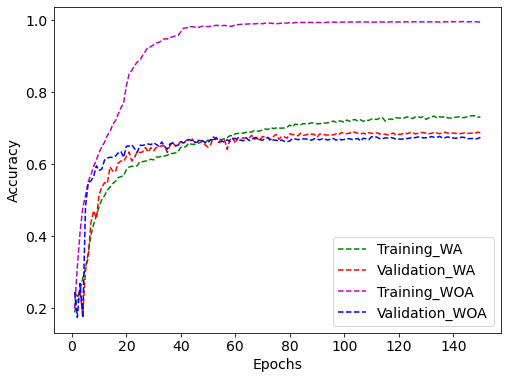

In [ ]:
from google.colab import files
epochs = range(1,151)
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 14
plt.plot(epochs, w_aug_acc, 'g--', label='Training_WA')
plt.plot(epochs, w_aug_val_acc, 'r--', label='Validation_WA')
plt.plot(epochs, wo_aug_acc, 'm--', label='Training_WOA')
plt.plot(epochs, wo_aug_val_acc, 'b--', label='Validation_WOA')
#plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('aug_acc.png')
files.download("aug_acc.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

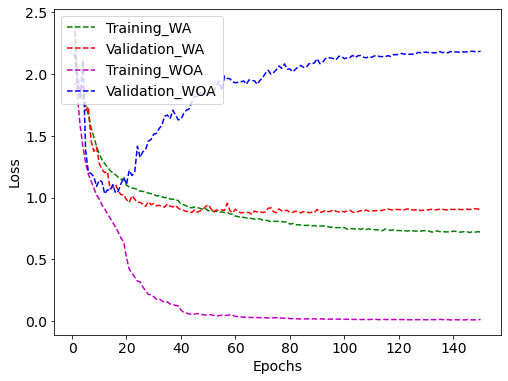

In [ ]:
from google.colab import files
epochs = range(1,151)
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 14
plt.plot(epochs, w_aug_loss, 'g--', label='Training_WA')
plt.plot(epochs, w_aug_val_loss, 'r--', label='Validation_WA')
plt.plot(epochs, wo_aug_loss, 'm--', label='Training_WOA')
plt.plot(epochs, wo_aug_val_loss, 'b--', label='Validation_WOA')
#plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('aug_loss.png')
files.download("aug_loss.png")
plt.show()